Jose Luis Soto Soto - 2181583


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import scipy.stats as stats
import random as rd

#Primer punto

In [26]:
x1 = np.linspace(-12,6,100)
x2 = np.linspace(-6,12,100)

X,Y = np.meshgrid(x1, x2)

Z = 8*X + 12*Y + X**2 - 2*Y**2


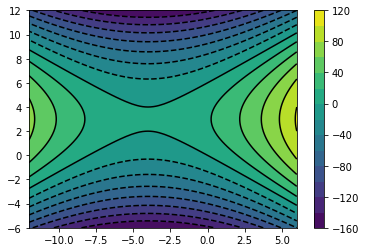

In [27]:
cs1 = plt.contourf(X, Y, Z, 15)  # Pintamos 25 niveles con relleno
cs2 = plt.contour(X, Y, Z, cs1.levels, colors='k')  # Añadimos bordes negros
plt.colorbar(cs1)
plt.show()

Por la variacion de la intensidad del color dirigiendose hacia la zona central de la grafica se puede apreciar el decremento de f desde los laterales asi como el aumento de f desde tanto la parte superior como inferior de la grafica. Por tanto, se puede decir que desde los laterales el centro aparenta ser un minimo, mientras que desde la parte superior/inferior, el centro aparenta ser un maximo, dejandonos concluir asi que es un punto de silla.

#Segundo Punto

Con el fin de minimizar $f$


Tal que
$$ f(x) = 100(x_2 - x_1^2)^2 + (1 - x_1)^2$$

Y su gradiente
$$ \nabla f(x) = \begin{bmatrix} -400x_1(x_2 - x_1^2) - 2(1-x_1) \\ 200(x_2- x_1^2) \end{bmatrix}$$



Junto con su Hessiana (para el metodo de newton)
$$  \nabla^2 f(x) =  \begin{bmatrix}  1200x_1^2 -400x_2+2 & -400x_1 \\
-400x_1 & 200 \end{bmatrix} $$


Se definen las siguientes funciones

In [28]:
def f(x):
  x , y = x
  return 100*((y-x**2)**2) + (1-x)**2.

def df(x):
  x , y = x
  dx = -400*x*(y-pow(x,2))-2*(1-x)
  dy =  200*(y-pow(x,2))
  return np.array([dx , dy])

def d2f(x):
  x , y = x
  dx_2 = 1200*(x**2)-400*y+2
  dxdy = -400*x
  dy_2 = 200

  return np.array([[dx_2, dxdy],[dxdy, dy_2]])

In [29]:
x_0 = np.array([1.2,1.2])

print(df(x_0))

[115.6 -48. ]


##Steepest Desccent

Para el metodo de steepest descent, en cada iteracion se halla el $\alpha$ mas optimo usando la condicion:

Cuando
$ f(x_k +\alpha P_k) < f(x_k) + c_1 \alpha \nabla f^{T} · P_k)  $
entonces $\alpha \leftarrow c2·\alpha$


Donde $c1,c2 \in (0,1)$

In [30]:
def step_size(f,df,x_k,p_k,c1,c2):
  step = 1
  while f(x_k + step*p_k) > f(x_k) + c1*step*np.dot(df(x_k),p_k):
    step = c2*step
  return step


El metodo del gradiente, a parte de hallar el mejor $\alpha$ para cada iteracion, funciona de la siguiente forma:

$$
x_{k+1} = x_k + \alpha·P_k 
$$

Donde $\alpha$ modera el tamaño el paso mientras que $P_k$ define la direccion de este.
Mientras que $P_k = -\hat{\nabla f_k} $, es decir, para steepest descent $P_k$ se define con a direccion contraria al gradiente (direccion opueta al vector unitarion gradiente).

In [31]:
#Metodo del gradiente descent
def grad(f,df,x_0,iter=10,c1=0.95,c2=0.95):
  x_k = x_0
  step_vals = []
  
  for i in range(1,iter+1):
    p_k = - (1/np.linalg.norm(df(x_k)))*df(x_k)
    step = step_size(f, df, x_k, p_k, c1, c2)
    step_vals.append(step)
    x_k_1 = x_k + step*p_k
    x_k = x_k_1

  return x_k, step_vals

##Newton

Para realizarlo por el metodo de Newton, se utiliza la misma formula para variar el $x$ que en el metodo del gradiente, sin embargo, para este caso:

$$
P_k = -(\nabla^{2} f_k)^{-1} · \nabla f_k
$$

In [32]:
def newton(f,df,H,x_0,iter=10,c1=0.95,c2=0.95):
  x_k = x_0
  step_vals = []
  for i in range(1,iter+1):
    p_k = - (np.linalg.inv(H(x_k)))@df(x_k)
    step = step_size(f, df, x_k, p_k, c1, c2)
    step_vals.append(step)
    x_k_1 = x_k + step*p_k
    x_k = x_k_1

  return x_k, step_vals

Ahora vamos a probar los algoritmos para el punto $[1.2, 1.2]$ y $[-1.2,1]$

In [33]:
x_0 =np.array([1.2,1.2])
iter = 200
x_g, d_g =grad(f,df,x_0,iter)
x_n, d_n = newton(f,df,d2f,x_0,iter)

alpha = pd.DataFrame({"Gradient Alpha (α)":d_g,"Newton Alpha (α)":d_n})
sns.scatterplot(data = alpha["Gradient Alpha (α)"])
print("Final with Gradient: [ " + x_g[0].astype(str) +" , "+ x_g[1].astype(str) +"]" )

Final with Gradient: [ 1.085506176497745 , 1.1786663179515033]


Final Point with Newton: [ 1.000000009393435 , 1.0000000185285844]


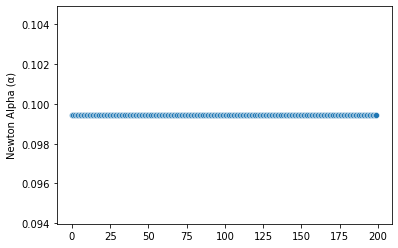

In [34]:
sns.scatterplot(data = alpha["Newton Alpha (α)"])
print("Final Point with Newton: [ " + x_n[0].astype(str) +" , "+ x_n[1].astype(str) +"]" )

Final with Gradient: [ 0.761921194216147 , 0.579552925748066]


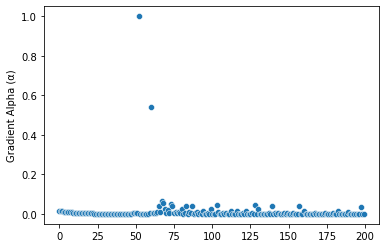

In [35]:
x_0 =np.array([-1.2,1])
iter = 200
x_g, d_g =grad(f,df,x_0,iter)
x_n, d_n = newton(f,df,d2f,x_0,iter)

alpha = pd.DataFrame({"Gradient Alpha (α)":d_g,"Newton Alpha (α)":d_n})
sns.scatterplot(data = alpha["Gradient Alpha (α)"])
print("Final with Gradient: [ " + x_g[0].astype(str) +" , "+ x_g[1].astype(str) +"]" )

Final Point with Newton: [ 0.9999955543146819 , 0.999991022998159]


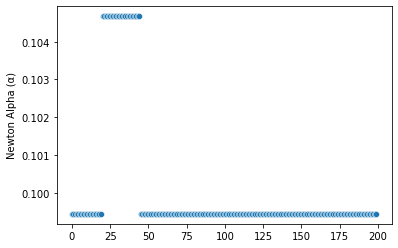

In [36]:
sns.scatterplot(data = alpha["Newton Alpha (α)"])
print("Final Point with Newton: [ " + x_n[0].astype(str) +" , "+ x_n[1].astype(str) +"]" )

#Tercer Punto

Muestre que para las Wolfe Conditions si  $0<c2<c1<1$ entonces es mas probable no encontrar un tamaño de paso que no cumpla con dichas condiciones

Primero que todo hemos de asumir que el numero de iteraciones ($X$) para cuando se cumple la condicion previa y para cuando no, estan descritos por una distribucion de probabilidad desconocida. Por tanto, de la "poblacion total" de iteraciones podriamos sacar un gran numero muestras de tamaño $N$ y hallar su media, de tal forma que se obtenga la distribucion de las medias muestrales que por el teorema del limite central ha de tender a una distribucion normal $\mathcal{N} \left ( \mu(X), \frac{\sigma(X)}{\sqrt{N}} \right )$

In [37]:
def p_grad(vdf):
  return -(1/np.linalg.norm(vdf))*vdf

def p_newton(vdf,vH):
  return -(np.linalg.inv(vH))@vdf

In [38]:
def wolf_conds(f,df,x_k,p_k,c1,c2):
  step = 1
  count = 0
  while (f(x_k + step*p_k) > f(x_k) + c1*step*np.dot(df(x_k),p_k))&(np.dot(df(x_k + alpha*p_k),p_k) >= c2*np.dot(df(x_k),p_k)):
    step = 0.95*step
    count = count + 1
  return step, count

In [22]:
means_cumple = []
means_nocumple = []
for _ in range(0,1000,1):
  counts_cumple = []
  counts_nocumple = []

  for j in range(0,5,1):
    c1 = rd.random()
    c2 = c1*rd.random() #Asegurnado c1>c2 (que cumple la condicion)

    decision1 = round(rd.random())
    decision2 = round(rd.random())

    if decision1 == 0:
      x_i = np.array([1.2,1.2])
    else:
      x_i = np.array([-1.2,1])

    if decision2 == 0:
      alpha, count = wolf_conds(f, df, x_i, p_grad(df(x_i)), c1, c2)#Para Gradiente
    else:
      alpha, count = wolf_conds(f, df, x_i, p_newton(df(x_i),d2f(x_i)), c1, c2)#Para Newton

    counts_cumple.append(count)

  means_cumple.append(sum(counts_cumple)/len(counts_cumple)) 

  for j in range(0,5,1):
    c2 = rd.random()
    c1 = c2*rd.random() #Asegurnado !c1>c2 (que no cumple la condicion)

    decision1 = round(rd.random())
    decision2 = round(rd.random())

    if decision1 == 0:
      x_i = np.array([1.2,1.2])
    else:
      x_i = np.array([-1.2,1])

    if decision2 == 0:
      alpha, count = wolf_conds(f, df, x_i, p_grad(df(x_i)), c1, c2)#Para Gradiente
    else:
      alpha, count = wolf_conds(f, df, x_i, p_newton(df(x_i),d2f(x_i)), c1, c2)#Para Newton

    counts_nocumple.append(count)

  means_nocumple.append(sum(counts_nocumple)/len(counts_nocumple))


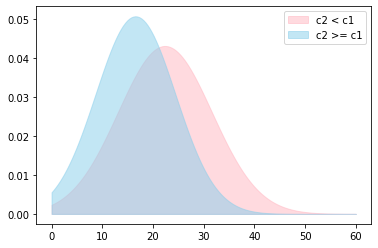

In [23]:
m_c = np.array([means_cumple])
m_nc = np.array([means_nocumple])

dist_mc =stats.norm(loc=m_c.mean(),scale=m_c.std())
dist_mnc =stats.norm(loc=m_nc.mean(),scale=m_nc.std())

x = np.linspace(0,60,150)

plt.fill_between(x, dist_mc.pdf(x), color="lightpink",alpha=0.5, label='c2 < c1')
plt.fill_between(x, dist_mnc.pdf(x), color="skyblue",alpha=0.5, label='c2 >= c1')
plt.legend(loc='best')
plt.show()

In [39]:
data = pd.DataFrame({"c2<c1":means_cumple,"c2>=c1":means_nocumple})
data.describe()

c2<c1       c2>=c1
count  1000.000000  1000.000000
mean     22.341200    16.537600
std       9.254215     7.864408
min       0.000000     0.000000
25%      16.000000    11.000000
50%      22.000000    15.800000
75%      27.800000    21.800000
max      64.400000    46.200000

Como se puede observar, tanto la media como la mediana indican que cuando se cumple la condicion $c2<c1$, entonces cuesta mas encontrar un $\alpha$ o mejor dicho "tamaño de paso" que cumpla con las wolfe conditions.